In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#구버젼의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

In [3]:
# 한글폰트 설정
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

# 폰트가 선명하게 보이도록 retina 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

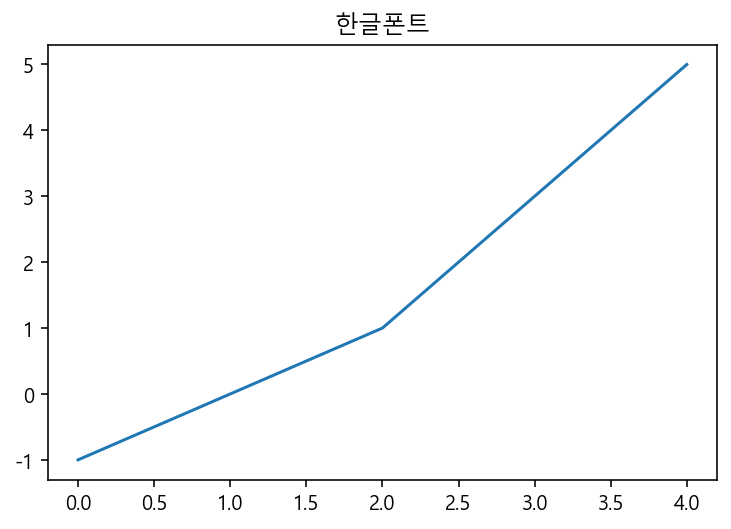

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

# 데이터 불러오기

In [7]:
df = pd.read_csv('data/전통시장현황.csv', encoding='CP949')
df.shape

(1450, 76)

In [8]:
df.head()

,시장형태,등록형태,시도,시군구,시장명,주소(지번),주소(도로명),"시장크기 (1=대형시장, 2=중대형시장, 3=중형시장, 4=소형시장)","시장면적(단위선택: 1=제곱미터, 2=평형)",시장면적(㎡),...,"보유여부 - 13건물실내조명 (LED조명 설치 여부)(1=LED조명, 2=형광등 및 백열등)","보유여부 - 13건물실내조명 (LED조명 설치 여부)(1=LED조명, 2=형광등 및 백열등).1","보유여부 - 1이동/고정식,이벤트 광장(1=있음, 2=없음)","보유여부 - 2테마거리(1=있음, 2=없음)","보유여부 - 3TV광고판(1=있음, 2=없음)","보유여부 - 4LED광고판(1=있음, 2=없음)","보유여부 - 6아치/조형물(1=있음, 2=없음)","시장/상점가의 주력 상품 여부(1=있음, 2=없음)","시장/상점가의 주력 상품의 개수(1=1개, 2=2개, 3=3개, 4=4개 이상)",시장/상점가의 주력 상품의 상품명
0,전통시장,등록,강원,강릉시,강릉동부시장,강원도 강릉시 옥천동 48,강원도 강릉시 수문길19번옆길 12-1,3,1,"7,109",...,1.0,2.0,2,2,2,2,1,1,1.0,건어물
1,전통시장,등록,강원,강릉시,강릉서부시장,강원도 강릉시 용강동 29,강원도 강릉시 임영로 155번길 6,4,1,"3,707",...,1.0,NaN,2,2,2,2,1,1,3.0,컴퓨터기기 감자전 추어탕
2,전통시장,인정,강원,강릉시,강릉성남시장,강원도 강릉시 성남동 53-8,강원도 강릉시 중앙시장길 24-2,3,1,"7,223",...,1.0,2.0,1,1,1,1,1,1,4.0,닭강정 국수 호떡 어묵고로케
3,전통시장,인정,강원,강릉시,주문진건어물시장,강원도 강릉시 주문리 312-708,강원도 강릉시 주문진읍 해안로1748,3,1,"26,359",...,1.0,2.0,1,1,2,2,2,1,4.0,건어물 수산물 회 대게
4,전통시장,등록,강원,강릉시,주문진수산시장,강원도 강릉시 주문리 312-91,강원도 강릉시주문진읍 시장1길 4 - 1,4,1,"1,881",...,1.0,NaN,1,1,1,1,1,1,4.0,문어 복어 홍개 대게 등


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 76 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   시장형태                                                                 1450 non-null   object 
 1   등록형태                                                                 1450 non-null   object 
 2   시도                                                                   1450 non-null   object 
 3   시군구                                                                  1450 non-null   object 
 4   시장명                                                                  1450 non-null   object 
 5   주소(지번)                                                               1450 non-null   object 
 6   주소(도로명)                                                              1450 non-null   object 
 7   시장크기 (

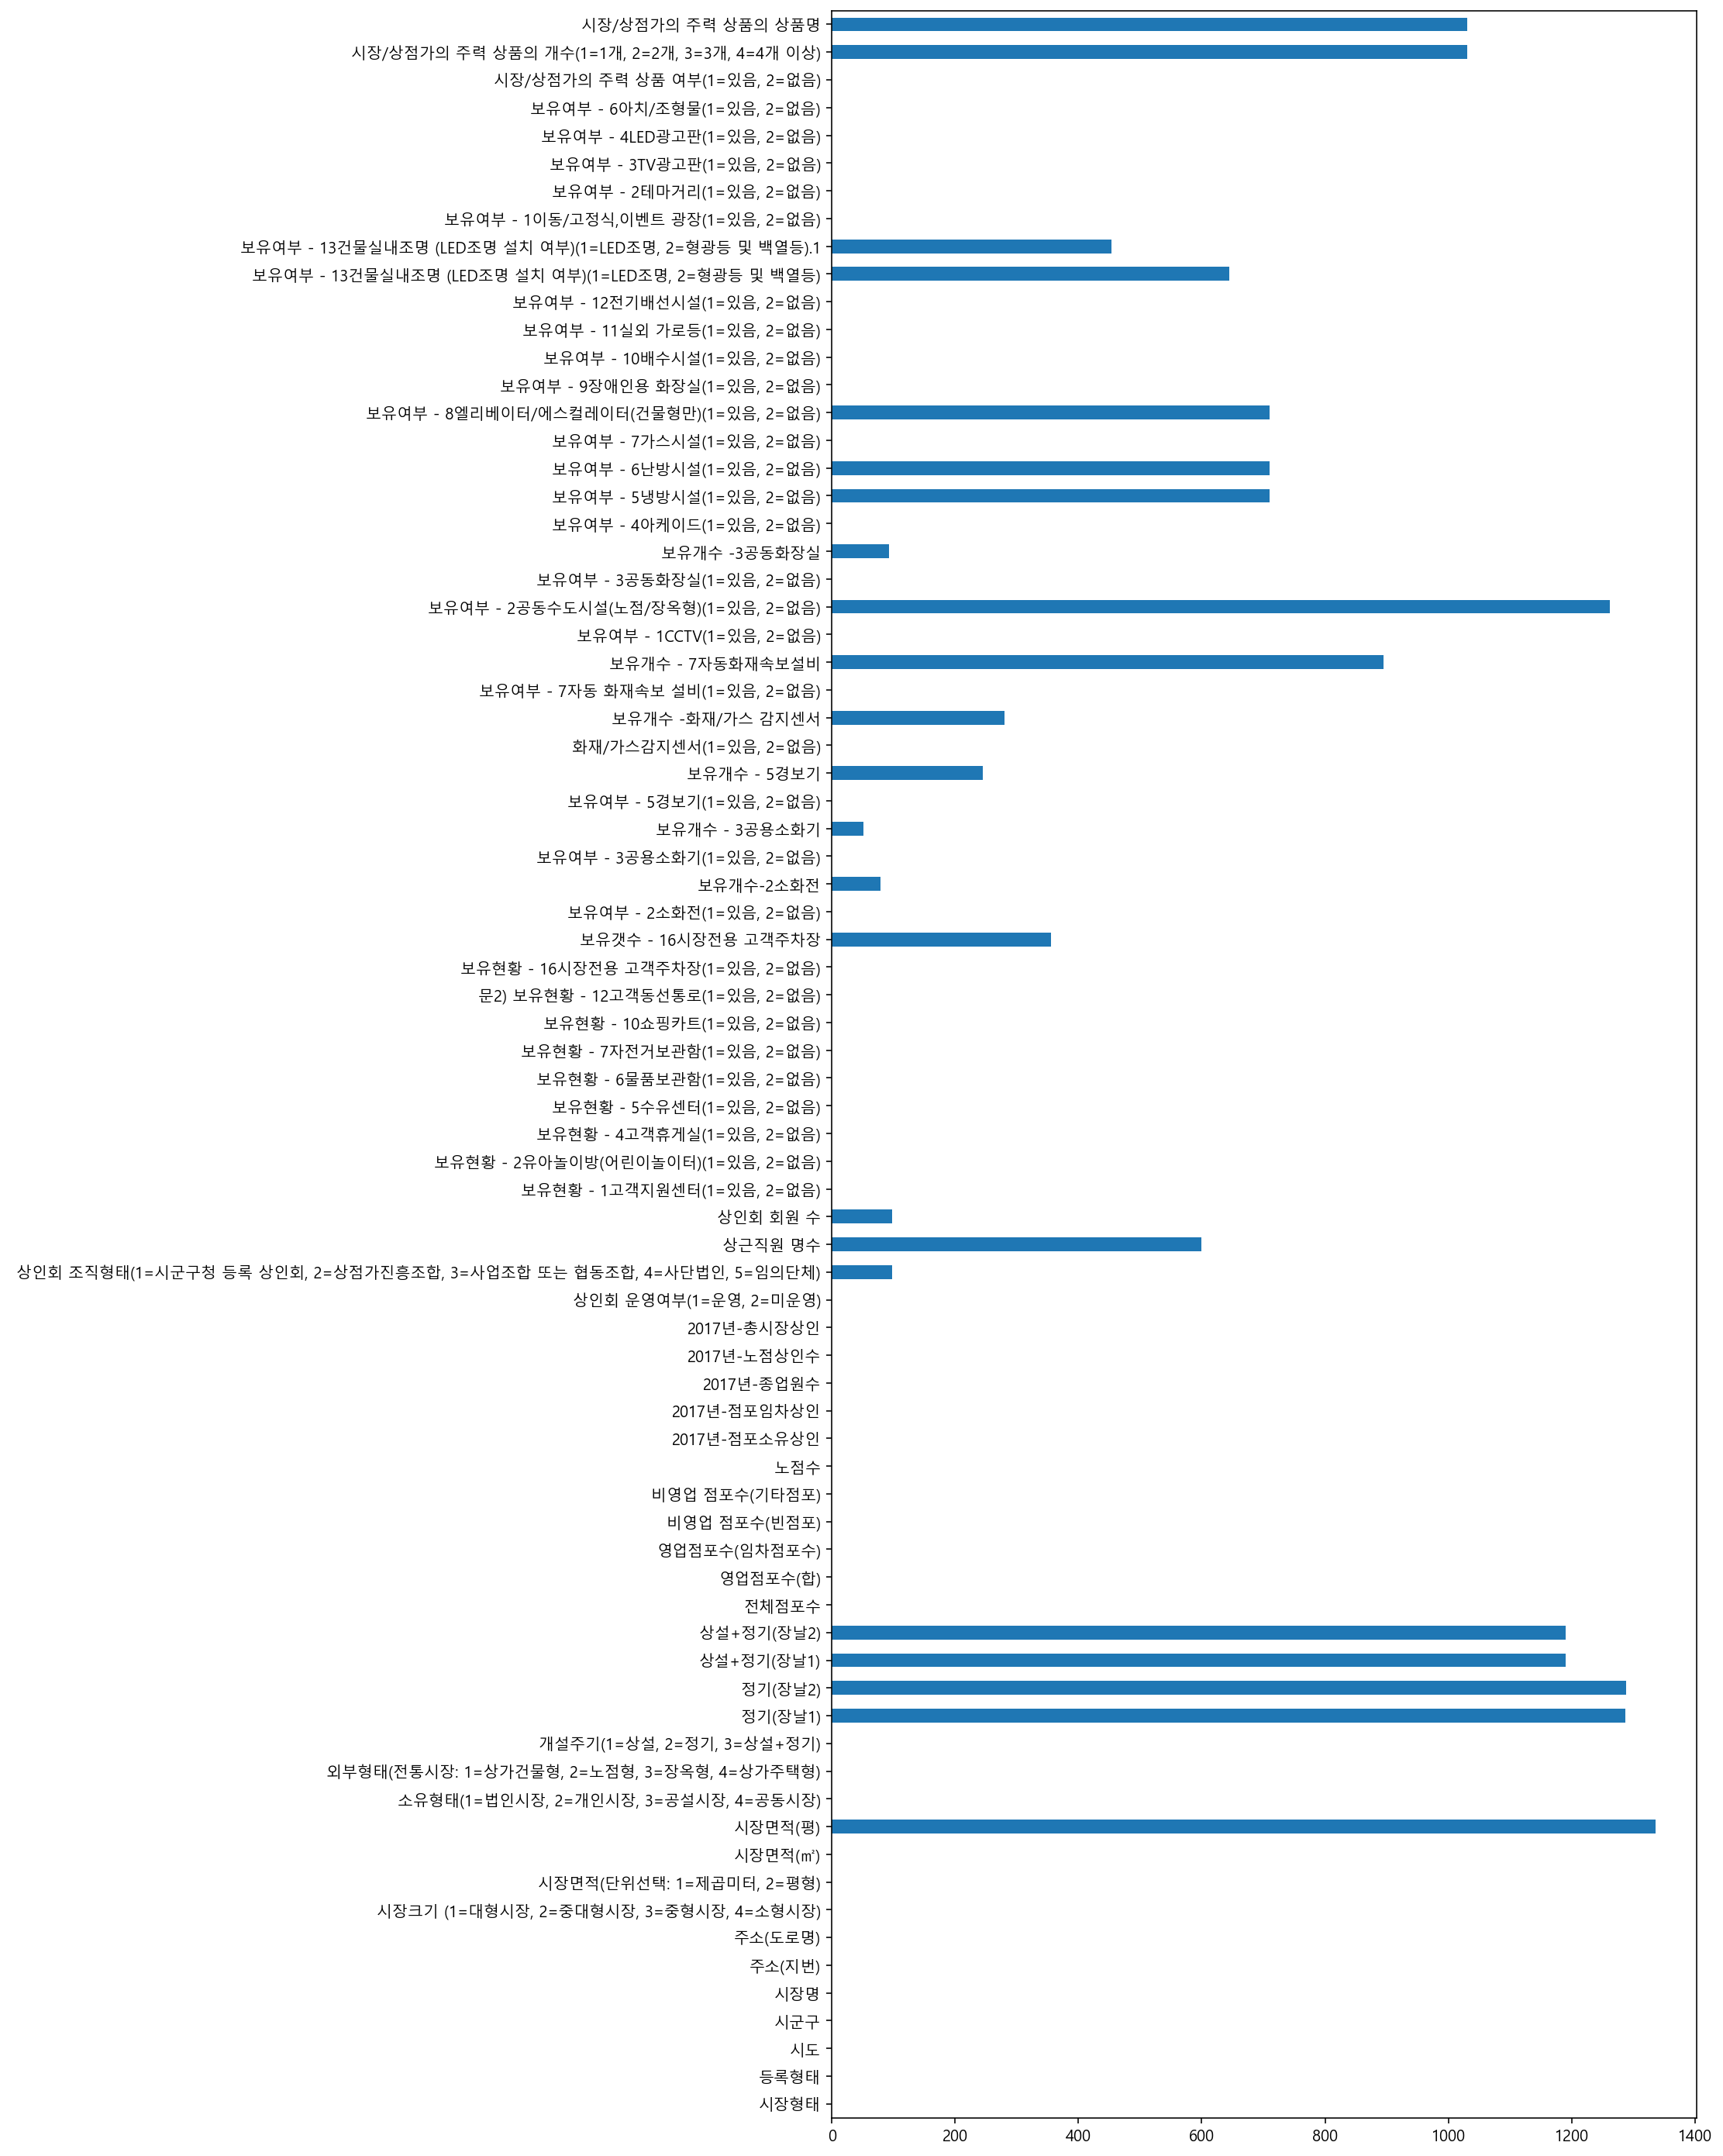

In [12]:
# 결측치 보기
df.isnull().sum().plot.barh(figsize=(10,25))

### 사용하지 않는 컬럼 제거하기

In [15]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.
df.columns 

Index(['시장형태', '등록형태', '시도', '시군구', '시장명', '주소(지번)', '주소(도로명)',
       '시장크기 (1=대형시장, 2=중대형시장, 3=중형시장, 4=소형시장)', '시장면적(단위선택: 1=제곱미터, 2=평형)',
       '시장면적(㎡)', '시장면적(평)', '소유형태(1=법인시장, 2=개인시장, 3=공설시장, 4=공동시장)',
       '외부형태(전통시장: 1=상가건물형, 2=노점형, 3=장옥형, 4=상가주택형)',
       '개설주기(1=상설, 2=정기, 3=상설+정기)', ' 정기(장날1)', ' 정기(장날2)', '상설+정기(장날1)',
       ' 상설+정기(장날2)', '전체점포수', '영업점포수(합)', '영업점포수(임차점포수)', '비영업 점포수(빈점포)',
       '비영업 점포수(기타점포)', ' 노점수', '2017년-점포소유상인', '2017년-점포임차상인', '2017년-종업원수',
       '2017년-노점상인수', '2017년-총시장상인', ' 상인회 운영여부(1=운영, 2=미운영)',
       ' 상인회 조직형태(1=시군구청 등록 상인회, 2=상점가진흥조합, 3=사업조합 또는 협동조합, 4=사단법인, 5=임의단체)',
       '상근직원 명수', '상인회 회원 수', '보유현황 - 1고객지원센터(1=있음, 2=없음)',
       '보유현황 - 2유아놀이방(어린이놀이터)(1=있음, 2=없음)', '보유현황 - 4고객휴게실(1=있음, 2=없음)',
       '보유현황 - 5수유센터(1=있음, 2=없음)', '보유현황 - 6물품보관함(1=있음, 2=없음)',
       '보유현황 - 7자전거보관함(1=있음, 2=없음)', '보유현황 - 10쇼핑카트(1=있음, 2=없음)',
       '문2) 보유현황 - 12고객동선통로(1=있음, 2=없음)', '보유현황 - 16시장전용 고객주차장(1=있음, 2=없음)',
       '보유갯수 - 16시장전용 고객주차장',

In [19]:
 columns = ['시장명','시군구','시도','보유갯수 - 16시장전용 고객주차장',
            '시장/상점가의 주력 상품 여부(1=있음, 2=없음)','보유현황 - 10쇼핑카트(1=있음, 2=없음)',
            '시장/상점가의 주력 상품의 상품명']

In [20]:
df = df[columns].copy()
df.shape

(1450, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   시장명                           1450 non-null   object 
 1   시군구                           1450 non-null   object 
 2   시도                            1450 non-null   object 
 3   보유갯수 - 16시장전용 고객주차장           1095 non-null   float64
 4   시장/상점가의 주력 상품 여부(1=있음, 2=없음)  1450 non-null   int64  
 5   보유현황 - 10쇼핑카트(1=있음, 2=없음)     1450 non-null   int64  
 6   시장/상점가의 주력 상품의 상품명            419 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 79.4+ KB


In [33]:
# 시도가 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul = df[df["시도"] == "서울"].copy()
df_seoul.shape

(211, 7)

### 일부 텍스트가 들어가는 데이터만 가져오기
* 시장명에서 '시장'이 들어가있는 시장만 추출합니다.

In [34]:
# 시장만 가져오기
df_seoul[df_seoul["시장명"].str.contains("시장")]

,시장명,시군구,시도,보유갯수 - 16시장전용 고객주차장,"시장/상점가의 주력 상품 여부(1=있음, 2=없음)","보유현황 - 10쇼핑카트(1=있음, 2=없음)",시장/상점가의 주력 상품의 상품명
848,강남시장,강남구,서울,1.0,2,2,NaN
849,논현종합시장,강남구,서울,1.0,2,2,NaN
851,영동전통시장,강남구,서울,1.0,2,2,NaN
852,청담삼익시장,강남구,서울,1.0,2,2,NaN
853,고덕전통시장,강동구,서울,1.0,2,2,NaN
...,...,...,...,...,...,...,...
1051,면목골목시장,중랑구,서울,1.0,2,2,NaN
1052,면목시장,중랑구,서울,1.0,2,2,NaN
1053,사가정시장,중랑구,서울,NaN,2,2,NaN
1055,우림골목시장,중랑구,서울,2.0,2,1,NaN


In [36]:
df_seoul.loc[df_seoul["시장명"].str.contains("시장"), "시장명"].shape

(184,)